# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [37]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-03-26 22:23:24--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-03-26 22:23:24--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip.1’

customer

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creación del DataFrame de ejemplo
data = pd.read_csv('customer_segmentation.csv',encoding="latin-1")
data.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [39]:
# Convertir InvoiceDate a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Mostrar el DataFrame
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [41]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [42]:
data.shape

(541909, 8)

In [43]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

In [44]:
data.groupby('Country')['Quantity'].sum() #Total de Quantity vendido por país.

,Quantity
Country,
Australia,83653
Austria,4827
Bahrain,260
Belgium,23152
Brazil,356
Canada,2763
Channel Islands,9479
Cyprus,6317
Czech Republic,592


In [45]:
data.groupby('Country')['UnitPrice'].mean() #Media de UnitPrice por país.

,UnitPrice
Country,
Australia,3.220612
Austria,4.243192
Bahrain,4.556316
Belgium,3.644335
Brazil,4.456250
Canada,6.030331
Channel Islands,4.932124
Cyprus,6.302363
Czech Republic,2.938333


In [46]:
data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5) #Países ordenados por total de Quantity vendido y obtener los 5 primeros

,Quantity
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480


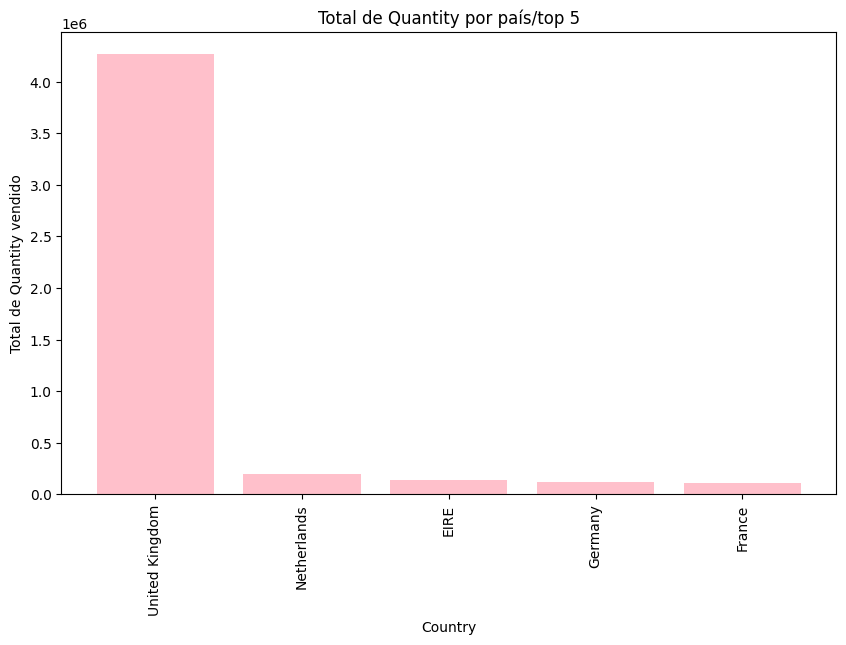

In [47]:
top_5_countries = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_countries.index, top_5_countries.values, color='pink')
plt.xlabel('Country')
plt.ylabel('Total de Quantity vendido')
plt.title('Total de Quantity por país/top 5')
plt.xticks(rotation=90)
plt.show()

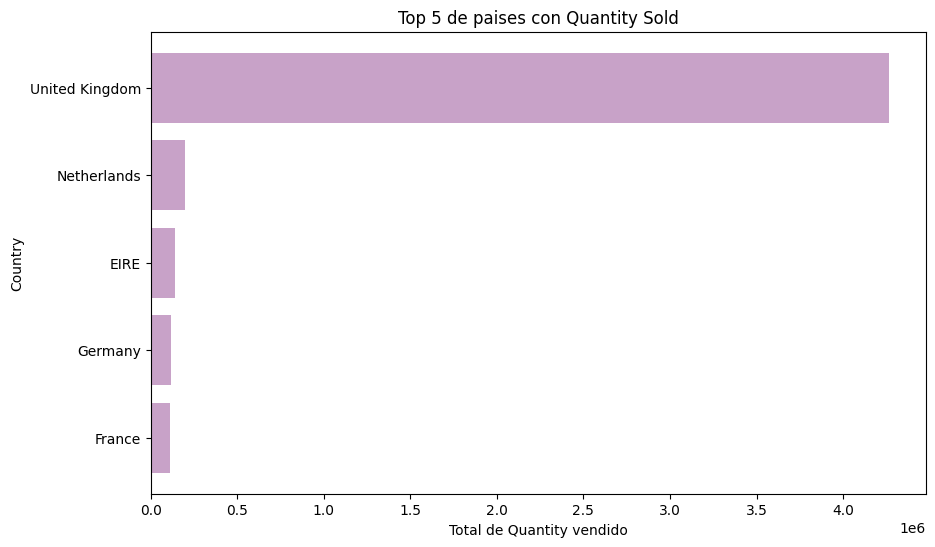

In [48]:
data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_countries.index, top_5_countries.values, color='#C8A2C8')
plt.xlabel('Total de Quantity vendido')
plt.ylabel('Country')
plt.title('Top 5 de paises con Quantity Sold')
plt.gca().invert_yaxis()
plt.show()

## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

In [49]:
data['StockCode'].value_counts()

,count
StockCode,
85123A,2313
22423,2203
85099B,2159
47566,1727
20725,1639
...,...
85179a,1
23617,1
90214U,1


In [50]:
data['StockCode'].value_counts().head(10)

,count
StockCode,
85123A,2313
22423,2203
85099B,2159
47566,1727
20725,1639
84879,1502
22720,1477
22197,1476
21212,1385


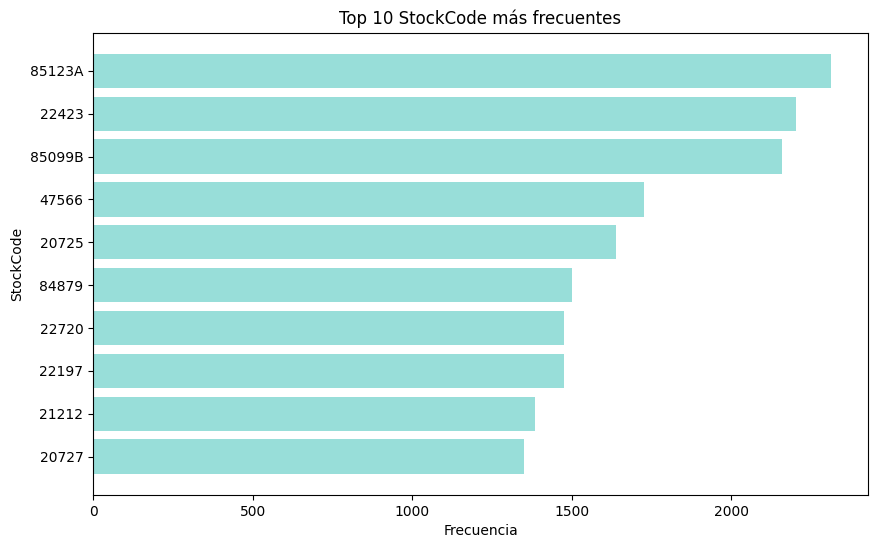

In [51]:
top_10_stockcodes= data['StockCode'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_stockcodes.index, top_10_stockcodes.values, color= '#98DED9')
plt.xlabel('Frecuencia')
plt.ylabel('StockCode')
plt.title('Top 10 StockCode más frecuentes')
plt.gca().invert_yaxis()
plt.show()

## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

In [52]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice'] #Creacion de una nueva columna 'TotalPrice'

In [53]:
invoice_totals = data.groupby('InvoiceNo')['TotalPrice'].sum() #Agrupacion por InvoiceNo junto con la suma de TotalPrice

In [54]:
average_invoice = invoice_totals.mean() #Factura promedio (media) del total de ventas por factura

In [55]:
average_invoice

np.float64(376.3609240926641)

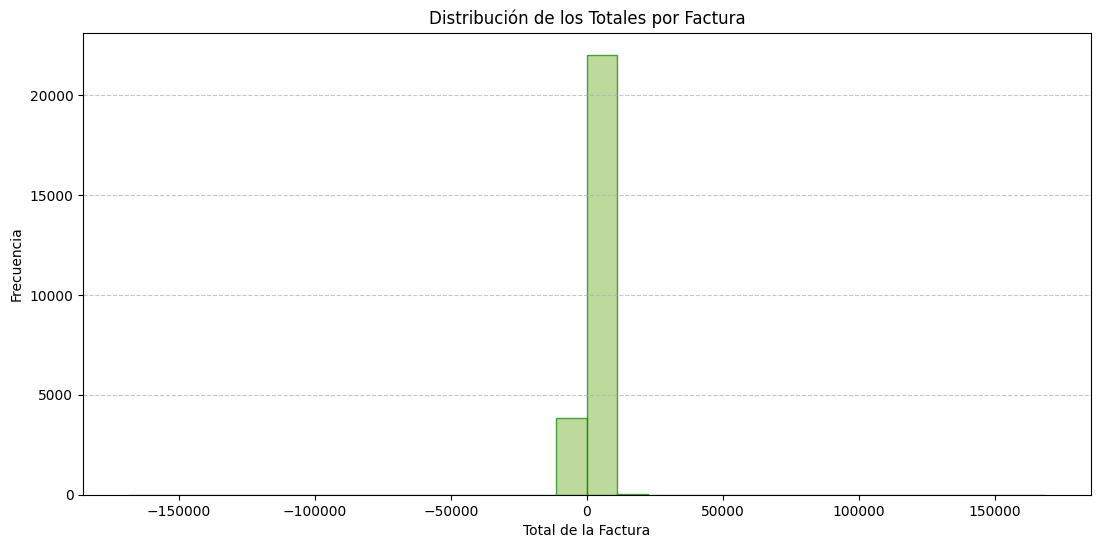

In [56]:
plt.figure(figsize=(13, 6))
plt.hist(invoice_totals, bins=30, color='#A2CA71', edgecolor='green', alpha=0.7)
plt.xlabel('Total de la Factura')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Totales por Factura')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

In [57]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']) #Columna InvoiceDate a tipo datetime

In [58]:
data_time = data.groupby('InvoiceDate')['TotalPrice'].sum() #agrupar por InvoiceDate sumando el TotalPrice

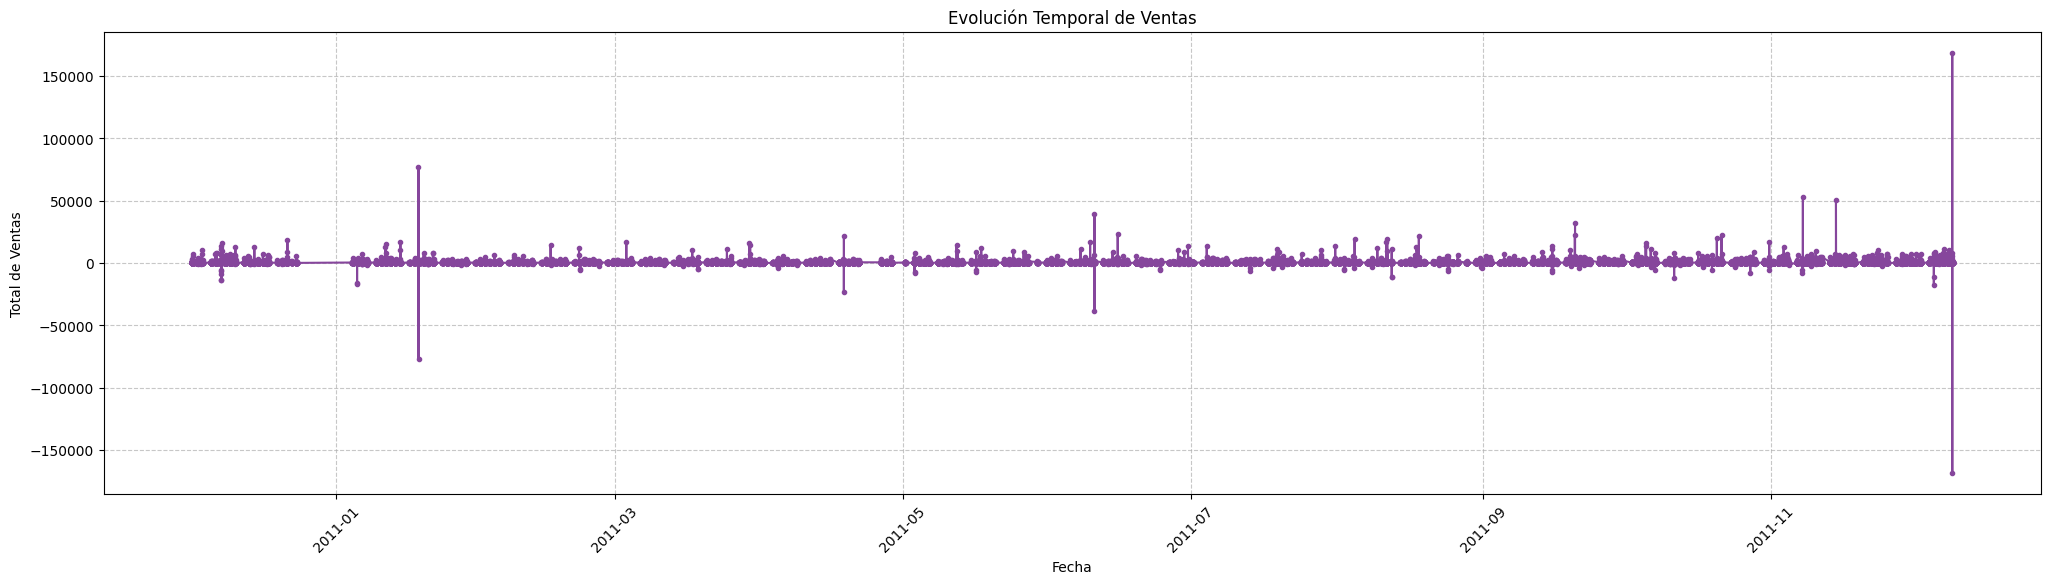

In [59]:
plt.figure(figsize=(25, 6))
plt.plot(data_time.index, data_time.values, color='#86469C', linestyle='-', marker='o', markersize=3)
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.title('Evolución Temporal de Ventas')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

In [60]:
# Países con suficientes datos
country_counts = data['Country'].value_counts()
top_countries = country_counts[country_counts > 100].index  # Solo países con más de 100 registros (filtrar)
data_filtered = data[data['Country'].isin(top_countries)]

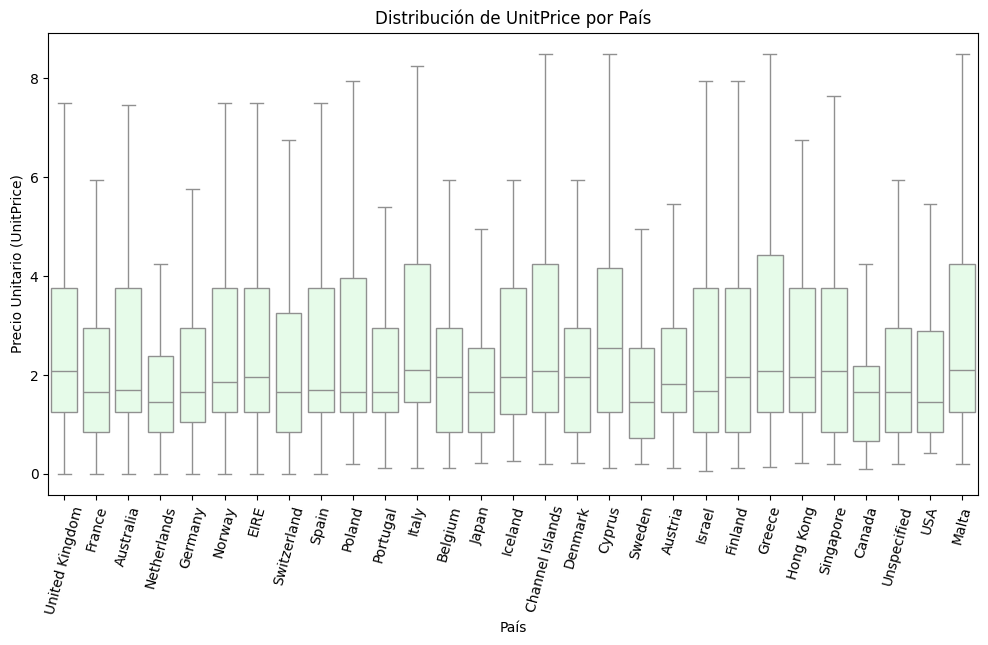

In [61]:
# Filtrar valores extremos (percentil 95) y crear gráfico
data_filtered = data_filtered[data_filtered['UnitPrice'] < data_filtered['UnitPrice'].quantile(0.95)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='UnitPrice', data=data_filtered, showfliers=False, color='#e2ffe6')
plt.xticks(rotation=75)
plt.xlabel('País')
plt.ylabel('Precio Unitario (UnitPrice)')
plt.title('Distribución de UnitPrice por País')
plt.show()


(507603, 9)


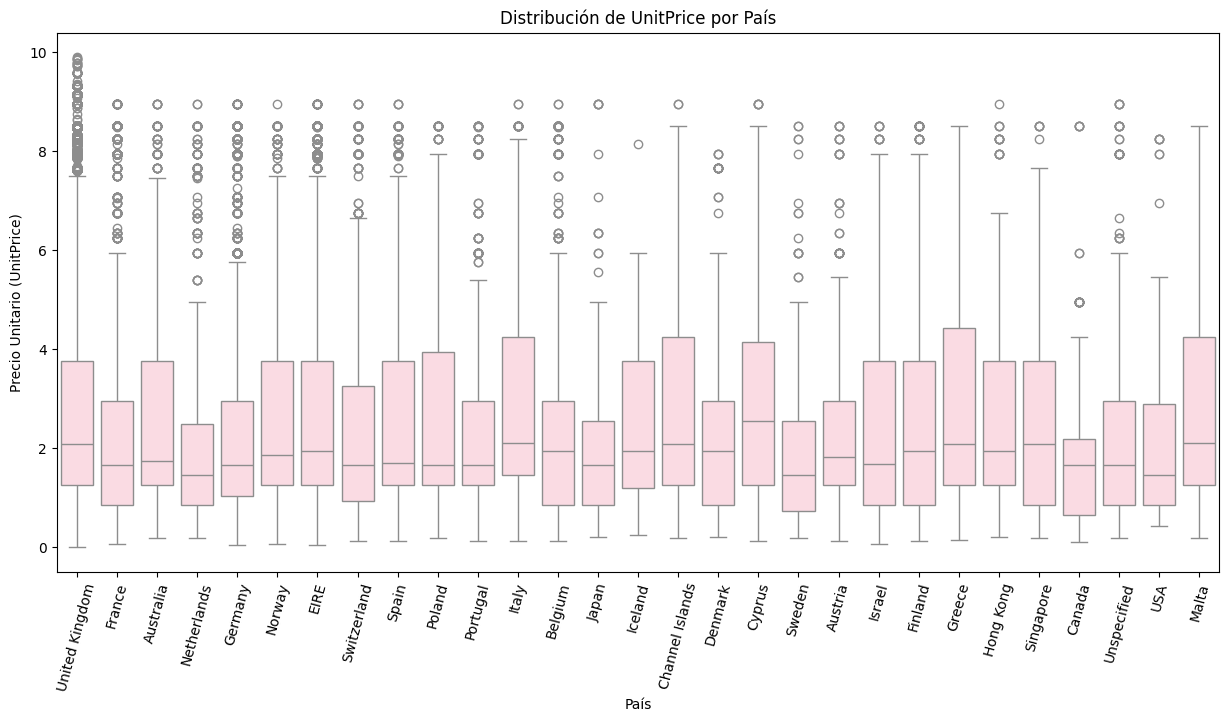

In [62]:
data_filtered = data_filtered[data_filtered['UnitPrice'] > 0] #No se ocultaron datos atipicos
print(data_filtered.shape) # Verificar si hay datos
# Gráfico
plt.figure(figsize=(15, 7))
sns.boxplot(x='Country', y='UnitPrice', data=data_filtered, color='#ffd6e0')
plt.xticks(rotation=75)
plt.xlabel('País')
plt.ylabel('Precio Unitario (UnitPrice)')
plt.title('Distribución de UnitPrice por País')
plt.show()

## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

In [63]:
data_filtered = data_filtered[data_filtered['Quantity'] > 0] #No se ocultaron datos atipicos

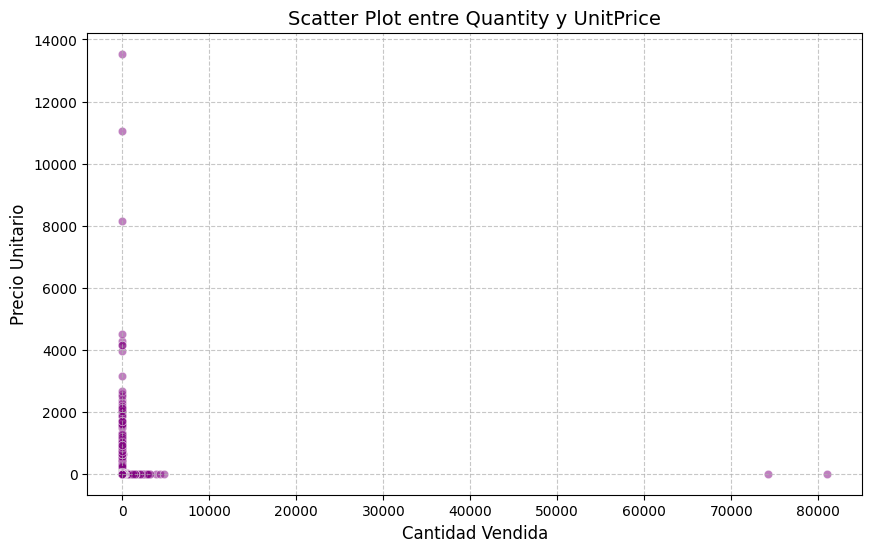

In [128]:
data_filtered = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_filtered['Quantity'], y=data_filtered['UnitPrice'], alpha=0.5, color="purple")
plt.xlabel('Cantidad Vendida', fontsize=12)
plt.ylabel('Precio Unitario', fontsize=12)
plt.title('Scatter Plot entre Quantity y UnitPrice', fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

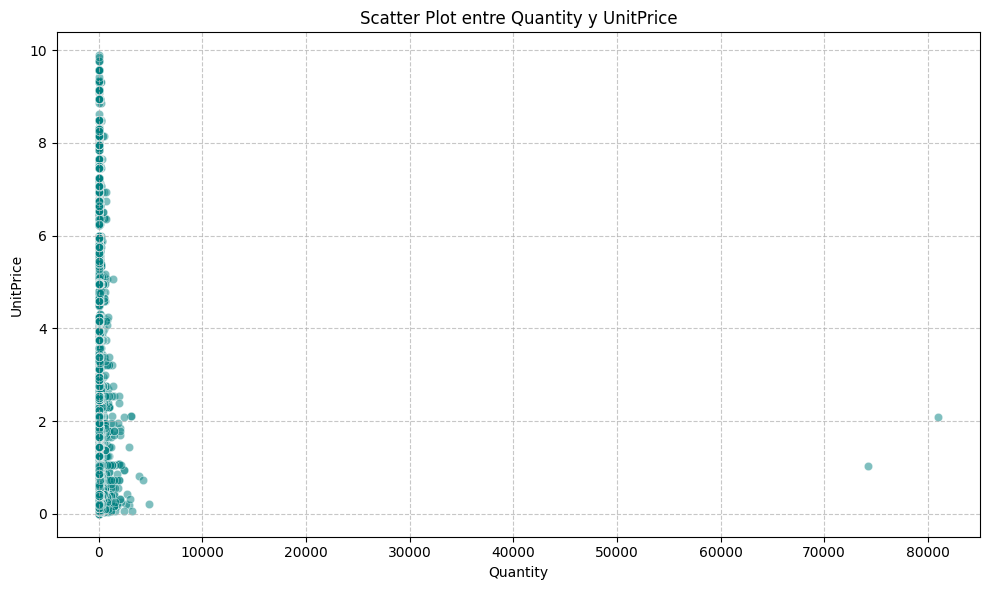

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_filtered['Quantity'], y=data_filtered['UnitPrice'], alpha=0.5, color='teal')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Scatter Plot entre Quantity y UnitPrice')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

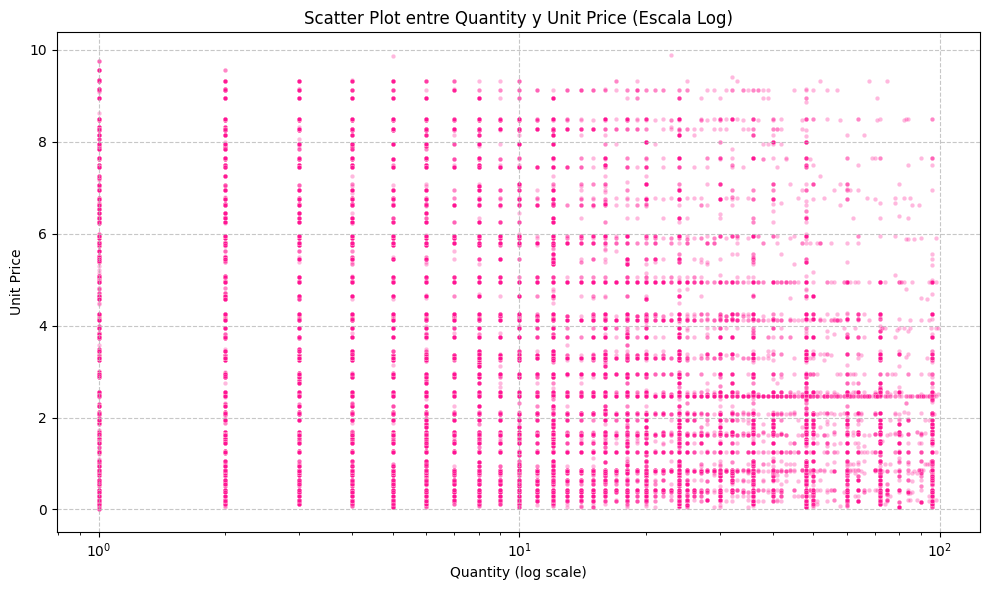

In [65]:
# Eliminar valores extremos del percentil 99 y mejor visualizacion de los datos
q99 = data_filtered['Quantity'].quantile(0.99)
data_filtered = data_filtered[data_filtered['Quantity'] < q99]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_filtered['Quantity'], y=data_filtered['UnitPrice'], alpha=0.3, s=10, color='deeppink')
plt.xscale('log') #Aplicar escala logarítmica en Quantity
plt.xlabel('Quantity (log scale)')
plt.ylabel('Unit Price')
plt.title('Scatter Plot entre Quantity y Unit Price (Escala Log)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [66]:
(data_filtered['Quantity'].corr(data_filtered['UnitPrice'])) #Relación entre cantidad vendida y precio unitario.

np.float64(-0.27662274188681985)

No se observa una correlación fuerte entre ambas variables, ya que los puntos están dispersos sin formar una tendencia clara. Sin embargo, se puede notar que los productos con precios más altos tienden a venderse en menores cantidades, mientras que los productos con precios bajos presentan una mayor variabilidad en las cantidades compradas.

## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

In [67]:
print(data['Country'].value_counts())

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [68]:
country_counts = data['Country'].value_counts()
total = country_counts.sum()
country_percentages = (country_counts / total) * 100

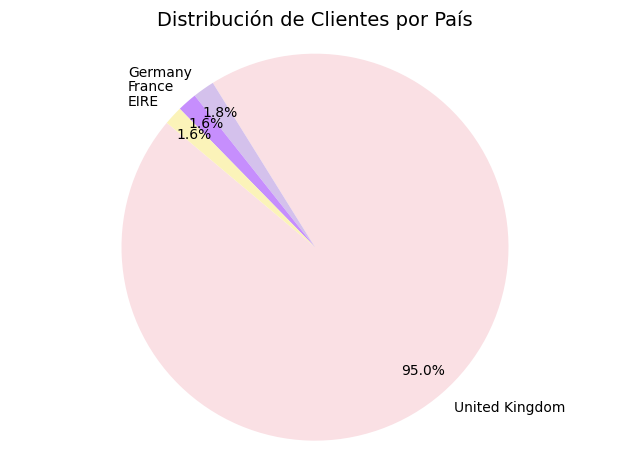

In [81]:
country_filtered= country_percentages[country_percentages > 0.5]
plt.pie(country_filtered, labels= country_filtered.index, autopct='%1.1f%%', startangle=140, colors=['#fae0e4','#d4c1ec', '#C68EFD','#FBF3B9' ], pctdistance=0.85)
plt.title('Distribución de Clientes por País', fontsize=14)
plt.xticks(rotation=45)
plt.axis('equal')
plt.tight_layout()
plt.show()

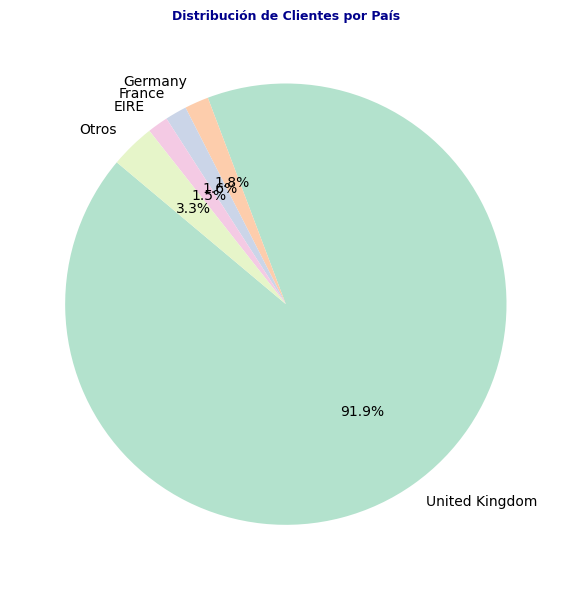

In [126]:
country_counts = data['Country'].value_counts()
top_5_countries = country_counts.head(4)
other_countries = country_counts.iloc[5:].sum()
top_5_countries["Otros"] = other_countries
plt.figure(figsize=(10, 6))
plt.pie(top_5_countries, labels=top_5_countries.index, autopct='%1.1f%%', colors=plt.cm.Pastel2.colors, startangle=140)
plt.title("Distribución de Clientes por País", fontsize=9, fontweight="bold", color="darkblue")
plt.tight_layout()
plt.show()

## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

In [71]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']) #Se convertio la columna InvoiceDate a Datatime

In [72]:
data['YearMonth'] = data['InvoiceDate'].dt.strftime('%Y-%m') #Se creo una nueva columna con el año y mes

In [73]:
monthly_avg_price = data.groupby('YearMonth')['UnitPrice'].mean()
monthly_avg_price

,UnitPrice
YearMonth,
2010-12,6.132644
2011-01,4.915151
2011-02,4.599876
2011-03,4.666554
2011-04,4.317588
2011-05,5.149486
2011-06,5.443330
2011-07,4.350088
2011-08,4.262149


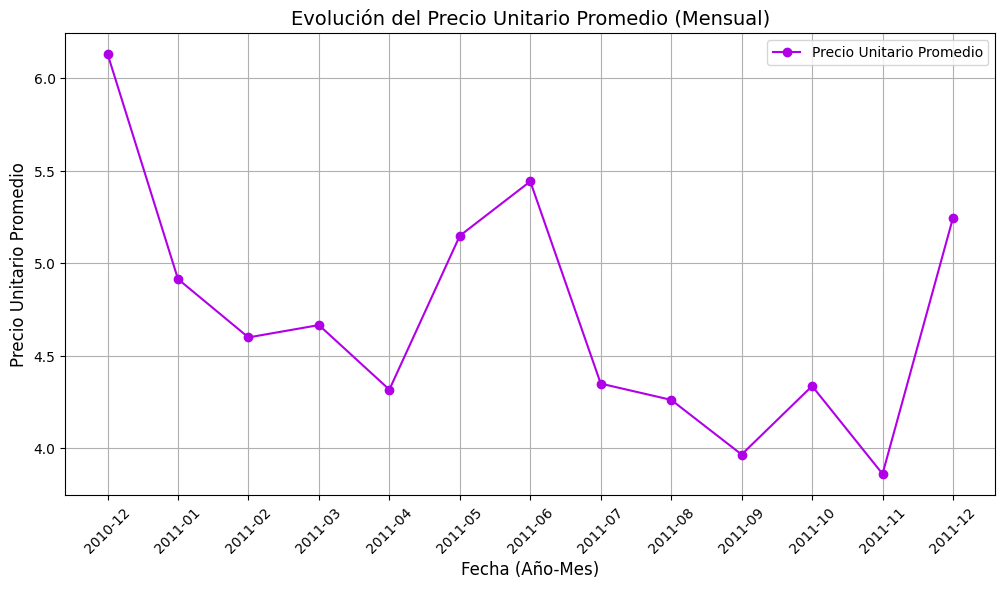

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_price.index, monthly_avg_price, marker='o', linestyle='-', color='#b100e8', label='Precio Unitario Promedio')
plt.title('Evolución del Precio Unitario Promedio (Mensual)', fontsize=14)
plt.xlabel('Fecha (Año-Mes)', fontsize=12)
plt.ylabel('Precio Unitario Promedio', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

In [74]:
data['Description'].value_counts()
product_counts = data['Description'].value_counts()

In [75]:
top_5_products = product_counts.head(5)  #los 5 productos con más frecuentes

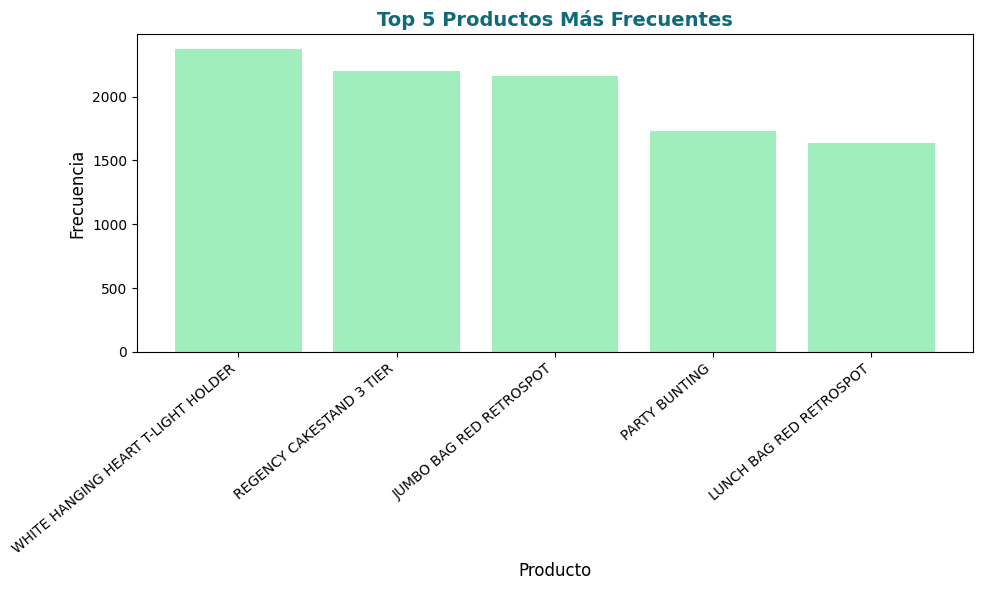

In [108]:
product_counts = data['Description'].value_counts()
top_5_products = product_counts.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top_5_products.index, top_5_products.values, color='#A1EEBD')
plt.ylabel('Frecuencia', fontsize=12)
plt.xlabel('Producto', fontsize=12)
plt.title('Top 5 Productos Más Frecuentes', fontsize=14, fontweight="bold", color='#116A7B')
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

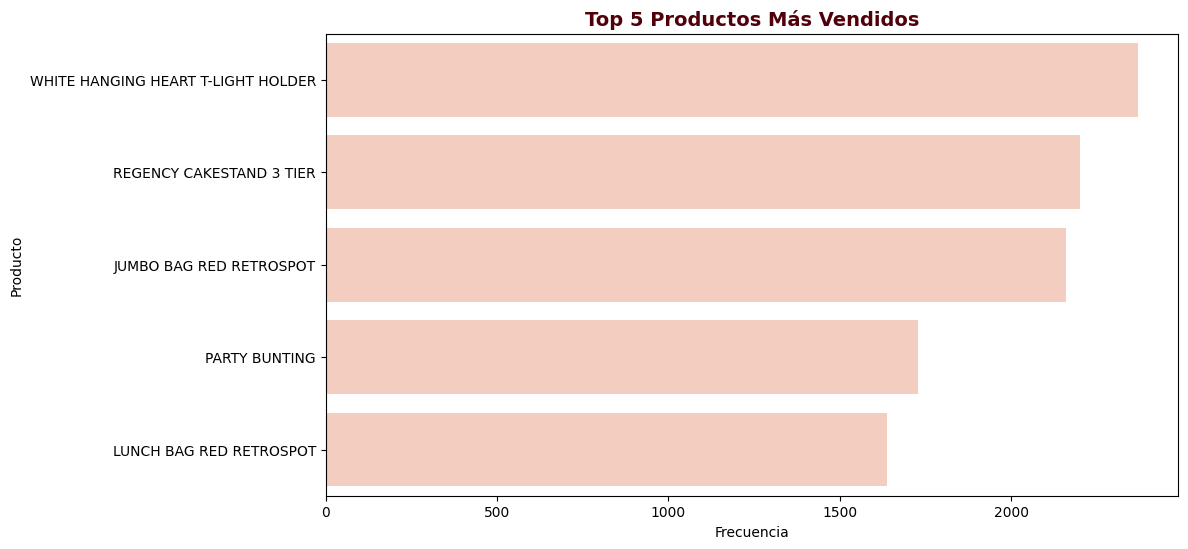

In [76]:
plt.figure(figsize=(11, 6))
sns.barplot(x=top_5_products.values, y=top_5_products.index, color='#fac9b8')
plt.xlabel("Frecuencia", fontsize=10)
plt.ylabel("Producto", fontsize=10)
plt.title("Top 5 Productos Más Vendidos", fontsize=14, fontweight="bold", color='#4f000b')
plt.show()

## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.